<a href="https://colab.research.google.com/github/sak1b0/proteiNN/blob/master/one_last_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

url_train='https://raw.githubusercontent.com/sak1b0/proteiNN/master/train_formatted.csv'
url_test='https://raw.githubusercontent.com/sak1b0/proteiNN/master/test_formatted.csv'

df_train=pd.read_csv(url_train,header=None)
df_test=pd.read_csv(url_test,header=None)



df_train=np.asarray(df_train)
df_test=np.asarray(df_test)

X_train = df_train[:100, 0]
y_train = df_train[:100, 1]

X_test = df_test[:100, 0]
y_test = df_test[:100, 1]

def debug_me():
  print('train dataframe: ',df_train.shape)
  print('X train shape: ',X_train.shape)
  print('y train shape: ',y_train.shape)

  print('test dataframe: ',df_test.shape)
  print('X test shape: ',X_test.shape)
  print('y test shape: ',y_test.shape)
  

debug_me()

max_length_train=0
for item in range (len(X_train)):
  max_length_train=max(max_length_train,len(X_train[item])) #finding maximum length of string in training
  
  
print('Maximum length of train: ',max_length_train)

max_length_test=0
for item in range (len(X_test)):
  max_length_test=max(max_length_test,len(X_test[item])) #finding maximum length of string in testing set
  
print('Maximum length of test: ',max_length_test)

max_length_train=max(max_length_train,max_length_test)



for item in range (len(X_train)):
  X_train[item] = X_train[item]+'Z'*(max_length_train-len(X_train[item])) # padding with 'Z' to make all of them the same length
  #X_train[item] = one_hot.fit_transform(X_train[item])
  
  
for item in range (len(y_train)):
  y_train[item] = y_train[item]+'Z'*(max_length_train-len(y_train[item])) # padding with 'Z' to make all of them the same length
  #y_train[item] = one_hot.fit_transform(y_train[item])
  
  
for item in range (len(X_test)):
  X_test[item] = X_test[item]+'Z'*(max_length_train-len(X_test[item])) # padding with 'Z' to make all of them the same length
  #X_test[item] =one_hot.fit_transform(X_test[item])
  
  
for item in range (len(y_test)):
  y_test[item] = y_test[item]+'Z'*(max_length_train-len(y_test[item])) # padding with 'Z' to make all of them the same length  
  #y_test[item] = one_hot.fit_transform(y_test[item])
  
  
#print(X_train[0])
#print(y_train[0])


print('\nafter padding: \n')

debug_me()
#print(X_train[0])
#print(y_train[0])
print(X_train[0])

#====================one cold encoder start=======

def OneColdEncoder(x):
  
  ret = list()
  
  encode = [[0 for i in range(26)] for j in range(26)]
  
  for i in range(26):
    encode[i][i] = 1
  
  ret = encode[ord(x)-65]
    
  return ret


#====================one cold encoder end=========


#encoding to integer of X_train

s = list(X_train)

for item in range(len(s)):
  s[item]=list(s[item])
  
#print(s)

k = []

for i in range(len(s)):
  t = []
  for item in range(len(s[i])):
    t.insert(2000, OneColdEncoder(s[i][item]))
    s[i][item]=ord(s[i][item])-64
  k.append(t)


X_train = np.array(k).reshape(100,1073,26)

#encoding to integer of y_train

s = list(y_train)

for item in range(len(s)):
  s[item]=list(s[item])
  
#print(s)

k = []

for i in range(len(s)):
  t = []
  for item in range(len(s[i])):
    t.insert(2000, OneColdEncoder(s[i][item]))
    s[i][item]=ord(s[i][item])-64
  k.append(t)


y_train = np.array(k).reshape(100,1073,26)

#encoding to integer of X_test

s = list(X_test)

for item in range(len(s)):
  s[item]=list(s[item])
  
#print(s)

k = []

for i in range(len(s)):
  t = []
  for item in range(len(s[i])):
    t.insert(2000, OneColdEncoder(s[i][item]))
    s[i][item]=ord(s[i][item])-64
  k.append(t)


X_test = np.array(k).reshape(100,1073,26)



#encoding to integer of y_test

s = list(y_test)

for item in range(len(s)):
  s[item]=list(s[item])
  
#print(s)

k = []

for i in range(len(s)):
  t = []
  for item in range(len(s[i])):
    t.insert(2000, OneColdEncoder(s[i][item]))
    s[i][item]=ord(s[i][item])-64
  k.append(t)


y_test = np.array(k).reshape(100,1073,26)




print('\nafter encoding to integers\n')
debug_me()

display(X_train[0])





train dataframe:  (4590, 2)
X train shape:  (100,)
y train shape:  (100,)
test dataframe:  (1199, 2)
X test shape:  (100,)
y test shape:  (100,)
Maximum length of train:  665
Maximum length of test:  1073

after padding: 

train dataframe:  (4590, 2)
X train shape:  (100,)
y train shape:  (100,)
test dataframe:  (1199, 2)
X test shape:  (100,)
y test shape:  (100,)
RTNQAGLELIGNAEGCRRDPYMCPAGVWTDGIGNTHGVTPGVRKTDQQIAADWEKNILIAERCINQHFRGKDMPDNAFSAMTSAAFNMGCNSLRTYYSKARGMRVETSIHKWAQKGEWVNMCNHLPDFVNSNGVPLRGLKIRREKERQLCLTGLVNEHHHHHHZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [32]:
#=======================this is where the fun part begins====================

model=Sequential()

model.add(LSTM((26),input_shape=(1073,26),return_sequences=True,activation='softmax'))


model.compile(loss='mean_absolute_error',optimizer='rmsprop',metrics=['accuracy'])

model.summary()

print(model.input_shape)
print(model.output_shape)

history=model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 1073, 26)          5512      
Total params: 5,512
Trainable params: 5,512
Non-trainable params: 0
_________________________________________________________________
(None, 1073, 26)
(None, 1073, 26)
Train on 100 samples, validate on 100 samples
Epoch 1/500
100/100 [==============================] - 11s 107ms/step - loss: 0.0561 - acc: 0.0121 - val_loss: 0.0560 - val_acc: 0.0158
Epoch 2/500
100/100 [==============================] - 9s 87ms/step - loss: 0.0560 - acc: 0.0160 - val_loss: 0.0559 - val_acc: 0.0214
Epoch 3/500
100/100 [==============================] - 9s 87ms/step - loss: 0.0559 - acc: 0.0215 - val_loss: 0.0558 - val_acc: 0.0259
Epoch 4/500
100/100 [==============================] - 9s 88ms/step - loss: 0.0558 - acc: 0.0250 - val_loss: 0.0557 - val_acc: 0.0298
Epoch 5/500
100/100 [=============================

KeyboardInterrupt: ignored

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0.01498194 0.01615649 0.02019663 0.01671166 0.01718424 0.01509286
 0.01617152 0.01742738 0.0150728  0.01503565 0.01798205 0.01636125
 0.01583055 0.01708618 0.01633419 0.01564607 0.01527274 0.01502206
 0.01611893 0.01716441 0.01524159 0.01476752 0.01669044 0.01716769
 0.01724202 0.01837393]


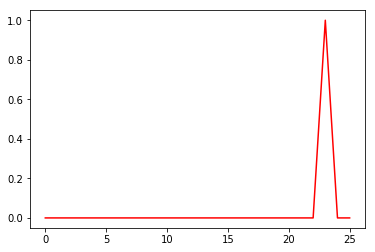

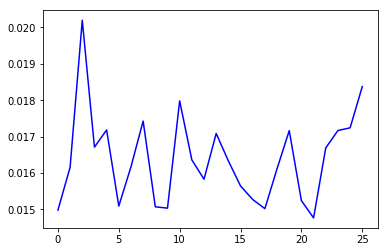

In [34]:
result= model.predict(X_test)
print(y_test[0][0])
print(result[0][0])
plt.plot(y_test[0][0],color='r')
plt.show()
plt.plot(result[0][0],color='b')
plt.show()